# Importing the required libraries


In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
from preprocessing import*
from model.convolutional_neural_network import *
from model.Executor import *
import warnings  
warnings.filterwarnings("ignore")

# Training Dataset Creation

Loading the dataset from the directory

In [2]:
dp = "./dataset" 
dataset = load_data(dp)

Counting the number of images present in each of the classes

In [3]:
tr_ds, te_ds = split_data(dataset)

# Loading Data with the help of DataLoader

In [4]:
tr_loader = train_dataloarder(tr_ds)
te_loader = test_dataloarder(te_ds)


# Training the CNN model

In [5]:
num_epochs = 2
exec_obj = Executor()
all_loss,iter_loss,accuracy = exec_obj.training_model_executor(
    tr_loader,
    num_epochs
)


 0/2... rate=0 Hz, eta=?, total=0:00:00, wall=22:47 EST
current iter acc: 83.89630793401413
current iter loss: 0.6898072769399732
 1/2... rate=0.07 Hz, eta=0:00:15, total=0:00:15, wall=22:47 EST
current iter acc: 91.04477611940298
current iter loss: 0.5463518136772336
 2/2... rate=0.07 Hz, eta=0:00:00, total=0:00:28, wall=22:48 EST


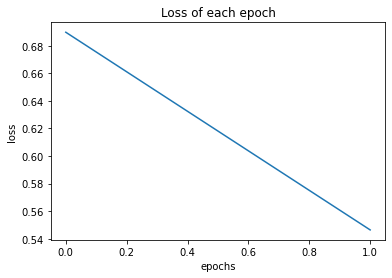

In [6]:
plt.plot(iter_loss)
plt.title("Loss of each epoch")
plt.xlabel("epochs")
plt.ylabel("loss");

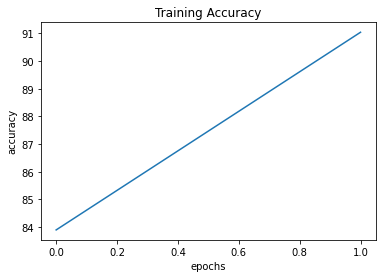

In [7]:
plt.plot(accuracy)
plt.title("Training Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy");

# Testing Network



In [8]:
testdata_accuracy = exec_obj.calculate_model_accuracy(te_loader)
print("Model accuracy test dataset :",testdata_accuracy)

Model accuracy test dataset : 89.96865203761756


# Confusion Matrix

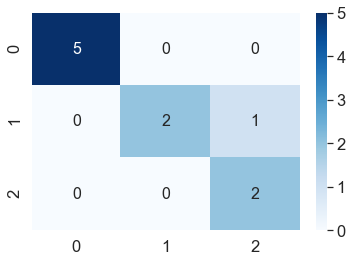

In [9]:
calc_model_weights, actual_results = next(iter(te_loader))
model_net = exec_obj.network(calc_model_weights)
pred_vals = torch.argmax(model_net, dim = 1)

sb.set(font_scale=1.5) 
sb.heatmap(
    confusion_matrix(actual_results.numpy(),pred_vals.numpy()),
    annot=True,
    annot_kws={"size": 16},
    cmap="Blues"
)  
plt.show()

# Classification Report

In [10]:
report = classification_report(
    actual_results.numpy(),
    pred_vals.numpy(), 
    target_names=['with mask','without mask','not a person']
)
print(report)  

              precision    recall  f1-score   support

   with mask       1.00      1.00      1.00         5
without mask       1.00      0.67      0.80         3
not a person       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.89      0.89      0.87        10
weighted avg       0.93      0.90      0.90        10

